In [21]:
# Let's first inspect the contents of the uploaded CSV file to understand its structure and data.
import pandas as pd

# Load the CSV file
file_path = '2024 52 weak high.csv'
data = pd.read_csv(file_path)


In [22]:
# Show the first few rows and basic information of the file
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Effective for 27-Sep-2024  2344 non-null   object
 1   Unnamed: 1                 2344 non-null   object
 2   Unnamed: 2                 2344 non-null   object
 3   Unnamed: 3                 2344 non-null   object
 4   Unnamed: 4                 2344 non-null   object
 5   Unnamed: 5                 2344 non-null   object
dtypes: object(6)
memory usage: 110.0+ KB


(None,
   Effective for 27-Sep-2024 Unnamed: 1             Unnamed: 2  \
 0                    SYMBOL     SERIES  Adjusted 52_Week_High   
 1                 20MICRONS         EQ                    348   
 2                    360ONE         EQ                   1215   
 3                 3IINFOLTD         EQ                   63.9   
 4                   3MINDIA         EQ                40856.5   
 
           Unnamed: 3            Unnamed: 4      Unnamed: 5  
 0  52_Week_High_Date  Adjusted 52_Week_Low  52_Week_Low_DT  
 1          22-Aug-24                   126       29-Sep-23  
 2           1-Aug-24                487.55        5-Oct-23  
 3          31-Jan-24                 30.25        4-Jun-24  
 4           2-Jul-24              28498.95       15-May-24  )

In [23]:
# Reload the CSV with the correct headers by skipping the first row
data_clean = pd.read_csv(file_path, skiprows=1)


In [24]:
# Renaming the columns for better clarity
data_clean.columns = ['SYMBOL', 'SERIES', 'Adjusted_52_Week_High', '52_Week_High_Date', 'Adjusted_52_Week_Low', '52_Week_Low_DT']


In [25]:
# Display the cleaned data
data_clean.head()

SYMBOL SERIES Adjusted_52_Week_High 52_Week_High_Date  \
0  20MICRONS     EQ                   348         22-Aug-24   
1     360ONE     EQ                  1215          1-Aug-24   
2  3IINFOLTD     EQ                  63.9         31-Jan-24   
3    3MINDIA     EQ               40856.5          2-Jul-24   
4     3PLAND     BE                 56.15          9-Aug-24   

  Adjusted_52_Week_Low 52_Week_Low_DT  
0                  126      29-Sep-23  
1               487.55       5-Oct-23  
2                30.25       4-Jun-24  
3             28498.95      15-May-24  
4                22.55      27-Sep-23

In [26]:
# Step 1: Load and Clean the CSV file (skip first row)
file_path = '2024 52 weak high.csv'
data = pd.read_csv(file_path, skiprows=1)

In [27]:
# Step 2: Rename the columns for better clarity
data.columns = ['SYMBOL', 'SERIES', 'Adjusted_52_Week_High', '52_Week_High_Date', 
                'Adjusted_52_Week_Low', '52_Week_Low_DT']

In [28]:
# Step 3: Convert data types
# Convert price columns to numeric, forcing errors to NaN for any invalid data
data['Adjusted_52_Week_High'] = pd.to_numeric(data['Adjusted_52_Week_High'], errors='coerce')
data['Adjusted_52_Week_Low'] = pd.to_numeric(data['Adjusted_52_Week_Low'], errors='coerce')

In [29]:
# Convert date columns to datetime
data['52_Week_High_Date'] = pd.to_datetime(data['52_Week_High_Date'], format='%d-%b-%y', errors='coerce')
data['52_Week_Low_DT'] = pd.to_datetime(data['52_Week_Low_DT'], format='%d-%b-%y', errors='coerce')

In [30]:

# Step 4: Check for missing values and handle them (e.g., drop rows with NaN values)
data_cleaned = data.dropna()

In [31]:
# Step 5: Add additional columns (e.g., Year and Month from date columns)
data_cleaned['High_Year'] = data_cleaned['52_Week_High_Date'].dt.year
data_cleaned['Low_Year'] = data_cleaned['52_Week_Low_DT'].dt.year

C:\Users\krithick.r\AppData\Local\Temp\ipykernel_5736\476181518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['High_Year'] = data_cleaned['52_Week_High_Date'].dt.year
C:\Users\krithick.r\AppData\Local\Temp\ipykernel_5736\476181518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Low_Year'] = data_cleaned['52_Week_Low_DT'].dt.year


In [32]:
# Step 6: Sort the data by highest 52-week high or lowest 52-week low
sorted_by_high = data_cleaned.sort_values(by='Adjusted_52_Week_High', ascending=False)
sorted_by_low = data_cleaned.sort_values(by='Adjusted_52_Week_Low')

In [33]:
# Step 7: Filter for stocks with 52-week high above a certain threshold (e.g., 1000)
high_threshold = data_cleaned[data_cleaned['Adjusted_52_Week_High'] > 1000]


In [34]:
# Step 8: Calculate the difference between the 52-week high and low
data_cleaned['High_Low_Difference'] = data_cleaned['Adjusted_52_Week_High'] - data_cleaned['Adjusted_52_Week_Low']

# Step 9: Display the cleaned and manipulated data
print(data_cleaned.head())
print("Stocks with 52-week high above 1000:")
print(high_threshold.head())

      SYMBOL SERIES  Adjusted_52_Week_High 52_Week_High_Date  \
0  20MICRONS     EQ                 348.00        2024-08-22   
1     360ONE     EQ                1215.00        2024-08-01   
2  3IINFOLTD     EQ                  63.90        2024-01-31   
3    3MINDIA     EQ               40856.50        2024-07-02   
4     3PLAND     BE                  56.15        2024-08-09   

   Adjusted_52_Week_Low 52_Week_Low_DT  High_Year  Low_Year  \
0                126.00     2023-09-29       2024      2023   
1                487.55     2023-10-05       2024      2023   
2                 30.25     2024-06-04       2024      2024   
3              28498.95     2024-05-15       2024      2024   
4                 22.55     2023-09-27       2024      2023   

   High_Low_Difference  
0               222.00  
1               727.45  
2                33.65  
3             12357.55  
4                33.60  
Stocks with 52-week high above 1000:
        SYMBOL SERIES  Adjusted_52_Week_High 52_W

C:\Users\krithick.r\AppData\Local\Temp\ipykernel_5736\2845067633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['High_Low_Difference'] = data_cleaned['Adjusted_52_Week_High'] - data_cleaned['Adjusted_52_Week_Low']


In [35]:
print(high_threshold.head())

        SYMBOL SERIES  Adjusted_52_Week_High 52_Week_High_Date  \
1       360ONE     EQ                1215.00        2024-08-01   
3      3MINDIA     EQ               40856.50        2024-07-02   
18       AAVAS     EQ                1978.95        2024-06-19   
20         ABB     EQ                9149.95        2024-06-18   
21  ABBOTINDIA     EQ               30521.00        2024-08-30   

    Adjusted_52_Week_Low 52_Week_Low_DT  High_Year  Low_Year  
1                 487.55     2023-10-05       2024      2023  
3               28498.95     2024-05-15       2024      2024  
18               1307.00     2024-03-28       2024      2024  
20               3850.00     2023-10-26       2024      2023  
21              22000.00     2023-12-21       2024      2023  


In [36]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Load and clean the CSV file (skip first row)
file_path = '2024 52 weak high.csv'
data = pd.read_csv(file_path, skiprows=1)

# Rename the columns
data.columns = ['SYMBOL', 'SERIES', 'Adjusted_52_Week_High', '52_Week_High_Date', 
                'Adjusted_52_Week_Low', '52_Week_Low_DT']


In [38]:
# Convert price columns to numeric and date columns to datetime
data['Adjusted_52_Week_High'] = pd.to_numeric(data['Adjusted_52_Week_High'], errors='coerce')
data['Adjusted_52_Week_Low'] = pd.to_numeric(data['Adjusted_52_Week_Low'], errors='coerce')
data['52_Week_High_Date'] = pd.to_datetime(data['52_Week_High_Date'], format='%d-%b-%y', errors='coerce')
data['52_Week_Low_DT'] = pd.to_datetime(data['52_Week_Low_DT'], format='%d-%b-%y', errors='coerce')


In [39]:
# Drop rows with missing values in critical columns
data_cleaned = data.dropna(subset=['Adjusted_52_Week_High', 'Adjusted_52_Week_Low'])


In [40]:

data_cleaned['High_Low_Difference'] = data_cleaned['Adjusted_52_Week_High'] - data_cleaned['Adjusted_52_Week_Low']


C:\Users\krithick.r\AppData\Local\Temp\ipykernel_5736\951859222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['High_Low_Difference'] = data_cleaned['Adjusted_52_Week_High'] - data_cleaned['Adjusted_52_Week_Low']


In [41]:
# Descriptive Statistics
high_low_summary = data_cleaned[['Adjusted_52_Week_High', 'Adjusted_52_Week_Low']].describe()
print("Descriptive Statistics for 52-Week High and Low:")
print(high_low_summary)

Descriptive Statistics for 52-Week High and Low:
       Adjusted_52_Week_High  Adjusted_52_Week_Low
count            2136.000000           2136.000000
mean             1201.162491            646.117158
std              4376.266158           2901.096462
min                 0.600000              0.300000
25%               116.717500             58.645000
50%               369.650000            188.150000
75%               998.850000            496.512500
max            151445.000000         106405.000000


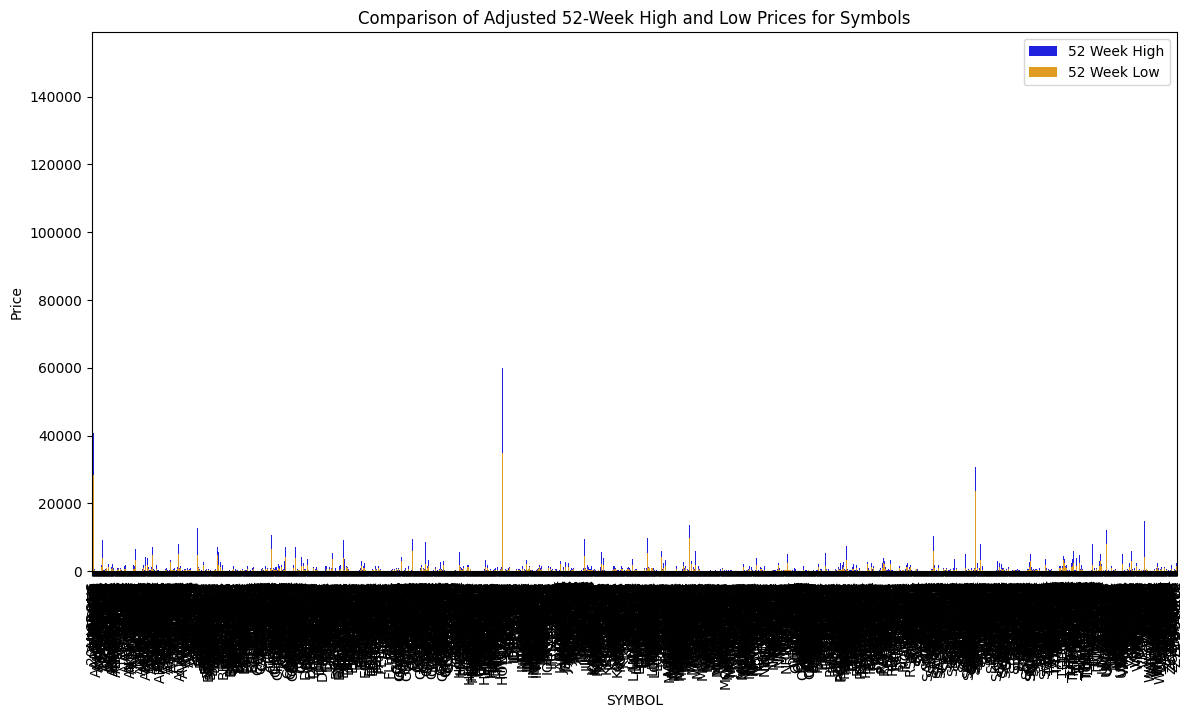

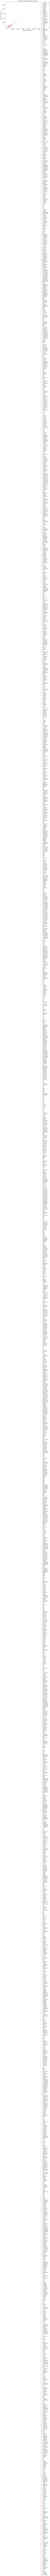

C:\Users\krithick.r\AppData\Local\Temp\ipykernel_5736\2638034060.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SYMBOL', y='High_Low_Difference', data=data_cleaned, palette='viridis')


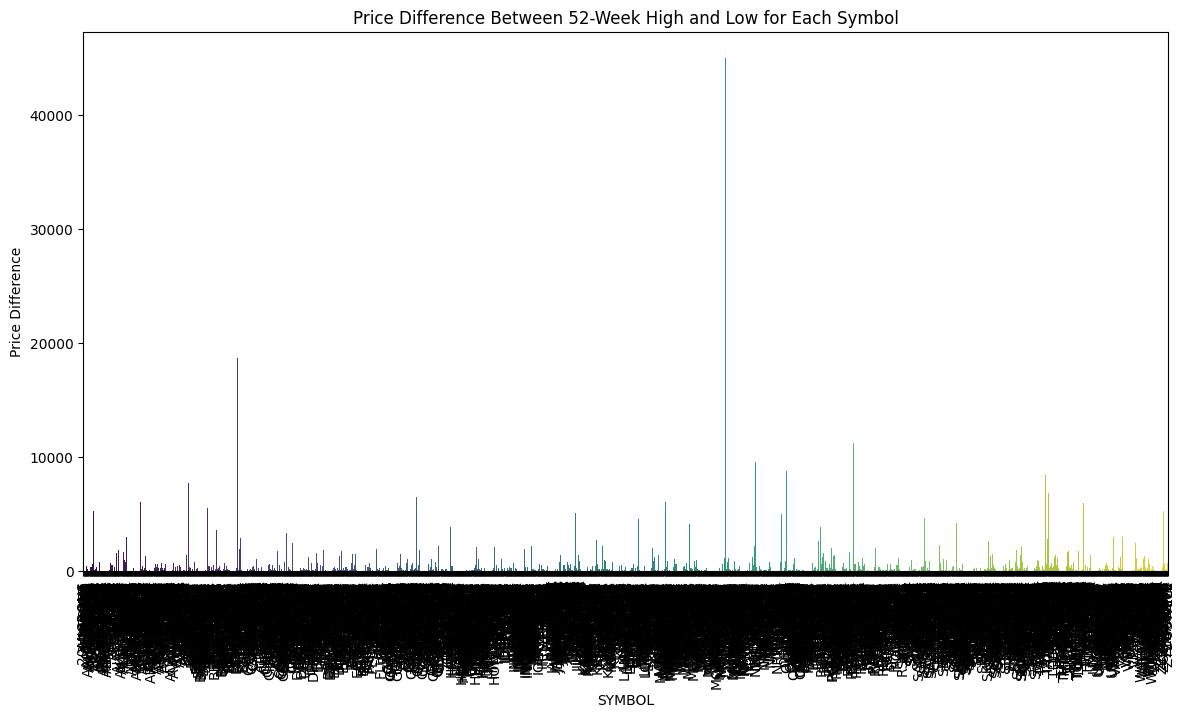

SYMBOL SERIES  Adjusted_52_Week_High 52_Week_High_Date  \
0  20MICRONS     EQ                 348.00        2024-08-22   
1     360ONE     EQ                1215.00        2024-08-01   
2  3IINFOLTD     EQ                  63.90        2024-01-31   
3    3MINDIA     EQ               40856.50        2024-07-02   
4     3PLAND     BE                  56.15        2024-08-09   
5     5PAISA     EQ                 758.45        2024-01-09   
6    63MOONS     EQ                 690.75        2023-12-11   
7    AAATECH     EQ                 160.85        2024-09-19   
8  AADHARHFC     EQ                 516.80        2024-09-24   
9     AAKASH     BE                  17.15        2024-07-04   

   Adjusted_52_Week_Low 52_Week_Low_DT  High_Low_Difference  
0                126.00     2023-09-29               222.00  
1                487.55     2023-10-05               727.45  
2                 30.25     2024-06-04                33.65  
3              28498.95     2024-05-15             12357.55  
4                 22.55     2023-09-27                33.60  
5                404.00     2023-10-26               354.45  
6                239.05     2023-10-16               451.70  
7                 56.05     2023-10-09               104.80  
8                292.00     2024-05-15               224.80  
9                  5.70     2023-10-09                11.45

In [42]:
# Insights and Visualization

# 1. Bar Plot: Compare Adjusted 52-Week High and Low for each SYMBOL
plt.figure(figsize=(14, 7))
sns.barplot(x='SYMBOL', y='Adjusted_52_Week_High', data=data_cleaned, color='blue', label='52 Week High')
sns.barplot(x='SYMBOL', y='Adjusted_52_Week_Low', data=data_cleaned, color='orange', label='52 Week Low')
plt.xticks(rotation=90)
plt.legend()
plt.title('Comparison of Adjusted 52-Week High and Low Prices for Symbols')
plt.ylabel('Price')
plt.show()

# 2. Scatter Plot: Relationship between 52-Week High and Low Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adjusted_52_Week_High', y='Adjusted_52_Week_Low', data=data_cleaned, hue='SYMBOL', palette='coolwarm')
plt.title('Scatter Plot: 52-Week High vs Low Prices')
plt.xlabel('Adjusted 52-Week High')
plt.ylabel('Adjusted 52-Week Low')
plt.show()

# 3. Bar Plot: High-Low Difference by SYMBOL
plt.figure(figsize=(14, 7))
sns.barplot(x='SYMBOL', y='High_Low_Difference', data=data_cleaned, palette='viridis')
plt.xticks(rotation=90)
plt.title('Price Difference Between 52-Week High and Low for Each Symbol')
plt.ylabel('Price Difference')
plt.show()

# Display cleaned data for top 10 rows
data_cleaned.head(10)


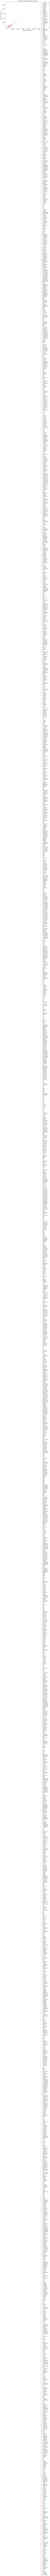

In [43]:
# 2. Scatter Plot: Relationship between 52-Week High and Low Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adjusted_52_Week_High', y='Adjusted_52_Week_Low', data=data_cleaned, hue='SYMBOL', palette='coolwarm')
plt.title('Scatter Plot: 52-Week High vs Low Prices')
plt.xlabel('Adjusted 52-Week High')
plt.ylabel('Adjusted 52-Week Low')
plt.show()

C:\Users\krithick.r\AppData\Local\Temp\ipykernel_5736\2606417205.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['High_Low_Difference'] = data_cleaned['Adjusted_52_Week_High'] - data_cleaned['Adjusted_52_Week_Low']


Descriptive Statistics for 52-Week High, Low, and their Difference:
       Adjusted_52_Week_High  Adjusted_52_Week_Low  High_Low_Difference
count            2136.000000           2136.000000          2136.000000
mean             1201.162491            646.117158           555.045332
std              4376.266158           2901.096462          1622.364746
min                 0.600000              0.300000             0.300000
25%               116.717500             58.645000            51.350000
50%               369.650000            188.150000           170.575000
75%               998.850000            496.512500           466.550000
max            151445.000000         106405.000000         45040.000000


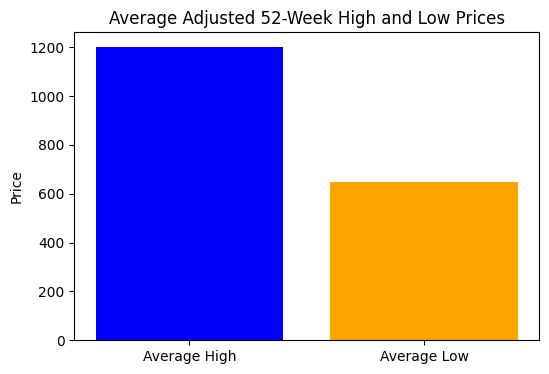

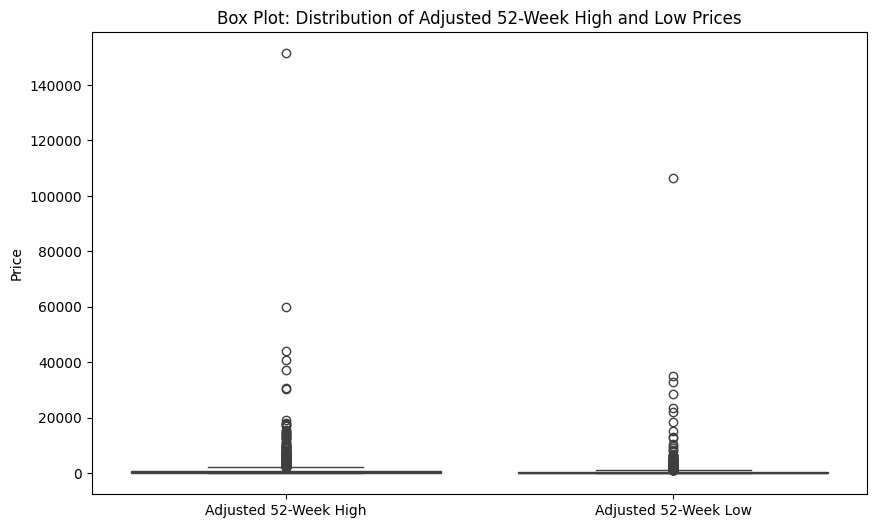

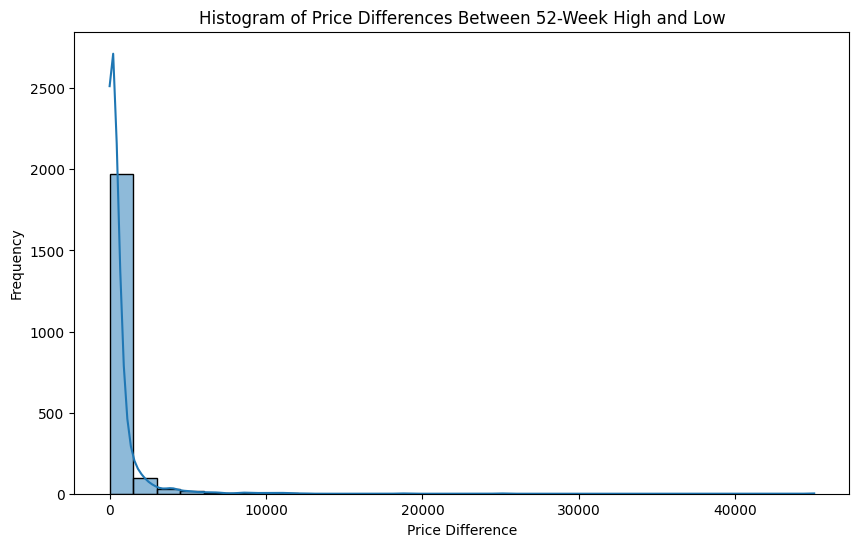

SYMBOL SERIES  Adjusted_52_Week_High 52_Week_High_Date  \
0  20MICRONS     EQ                 348.00        2024-08-22   
1     360ONE     EQ                1215.00        2024-08-01   
2  3IINFOLTD     EQ                  63.90        2024-01-31   
3    3MINDIA     EQ               40856.50        2024-07-02   
4     3PLAND     BE                  56.15        2024-08-09   
5     5PAISA     EQ                 758.45        2024-01-09   
6    63MOONS     EQ                 690.75        2023-12-11   
7    AAATECH     EQ                 160.85        2024-09-19   
8  AADHARHFC     EQ                 516.80        2024-09-24   
9     AAKASH     BE                  17.15        2024-07-04   

   Adjusted_52_Week_Low 52_Week_Low_DT  High_Low_Difference  
0                126.00     2023-09-29               222.00  
1                487.55     2023-10-05               727.45  
2                 30.25     2024-06-04                33.65  
3              28498.95     2024-05-15             12357.55  
4                 22.55     2023-09-27                33.60  
5                404.00     2023-10-26               354.45  
6                239.05     2023-10-16               451.70  
7                 56.05     2023-10-09               104.80  
8                292.00     2024-05-15               224.80  
9                  5.70     2023-10-09                11.45

In [44]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the CSV file (skip first row)
file_path = '2024 52 weak high.csv'
data = pd.read_csv(file_path, skiprows=1)

# Rename the columns
data.columns = ['SYMBOL', 'SERIES', 'Adjusted_52_Week_High', '52_Week_High_Date', 
                'Adjusted_52_Week_Low', '52_Week_Low_DT']

# Convert price columns to numeric and date columns to datetime
data['Adjusted_52_Week_High'] = pd.to_numeric(data['Adjusted_52_Week_High'], errors='coerce')
data['Adjusted_52_Week_Low'] = pd.to_numeric(data['Adjusted_52_Week_Low'], errors='coerce')
data['52_Week_High_Date'] = pd.to_datetime(data['52_Week_High_Date'], format='%d-%b-%y', errors='coerce')
data['52_Week_Low_DT'] = pd.to_datetime(data['52_Week_Low_DT'], format='%d-%b-%y', errors='coerce')

# Drop rows with missing values in critical columns
data_cleaned = data.dropna(subset=['Adjusted_52_Week_High', 'Adjusted_52_Week_Low'])

# Calculate the price difference between the high and low
data_cleaned['High_Low_Difference'] = data_cleaned['Adjusted_52_Week_High'] - data_cleaned['Adjusted_52_Week_Low']

# Descriptive Statistics for overall insights
high_low_summary = data_cleaned[['Adjusted_52_Week_High', 'Adjusted_52_Week_Low', 'High_Low_Difference']].describe()
print("Descriptive Statistics for 52-Week High, Low, and their Difference:")
print(high_low_summary)

# Insights and Visualization

# 1. Bar Plot: Average Adjusted 52-Week High and Low
avg_high = data_cleaned['Adjusted_52_Week_High'].mean()
avg_low = data_cleaned['Adjusted_52_Week_Low'].mean()

plt.figure(figsize=(6, 4))
plt.bar(['Average High', 'Average Low'], [avg_high, avg_low], color=['blue', 'orange'])
plt.title('Average Adjusted 52-Week High and Low Prices')
plt.ylabel('Price')
plt.show()

# 2. Box Plot: Distribution of Adjusted 52-Week High and Low Prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned[['Adjusted_52_Week_High', 'Adjusted_52_Week_Low']])
plt.title('Box Plot: Distribution of Adjusted 52-Week High and Low Prices')
plt.ylabel('Price')
plt.xticks(ticks=[0, 1], labels=['Adjusted 52-Week High', 'Adjusted 52-Week Low'])
plt.show()

# 3. Histogram of Price Differences
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['High_Low_Difference'], bins=30, kde=True)
plt.title('Histogram of Price Differences Between 52-Week High and Low')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.show()

# Display cleaned data for top 10 rows
data_cleaned.head(10)


In [45]:
# Load and clean the CSV file (skip first row)
file_path ='2024 52 weak high.csv'
data = pd.read_csv(file_path, skiprows=1)

In [46]:
import pandas as pd

In [47]:
data.columns = ['SYMBOL', 'SERIES', 'Adjusted_52_Week_High', '52_Week_High_Date', 
                'Adjusted_52_Week_Low', '52_Week_Low_DT']

In [18]:
# Convert price columns to numeric
data['Adjusted_52_Week_High'] = pd.to_numeric(data['Adjusted_52_Week_High'], errors='coerce')
data['Adjusted_52_Week_Low'] = pd.to_numeric(data['Adjusted_52_Week_Low'], errors='coerce')

In [19]:
# Convert date columns to datetime
data['52_Week_High_Date'] = pd.to_datetime(data['52_Week_High_Date'], format='%d-%b-%y', errors='coerce')
data['52_Week_Low_DT'] = pd.to_datetime(data['52_Week_Low_DT'], format='%d-%b-%y', errors='coerce')

In [49]:
# Descriptive Statistics
high_low_summary = data_cleaned[['Adjusted_52_Week_High', 'Adjusted_52_Week_Low']].describe()
print("Descriptive Statistics for 52-Week High and Low:")
print(high_low_summary)

Descriptive Statistics for 52-Week High and Low:
       Adjusted_52_Week_High  Adjusted_52_Week_Low
count            2136.000000           2136.000000
mean             1201.162491            646.117158
std              4376.266158           2901.096462
min                 0.600000              0.300000
25%               116.717500             58.645000
50%               369.650000            188.150000
75%               998.850000            496.512500
max            151445.000000         106405.000000
